In [1]:
# Import Dependencies
%matplotlib inline
import pandas as pd
import requests
import json
from pprint import pprint
import random
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties
from matplotlib import pylab
from matplotlib.pyplot import figure

In [2]:
pitch_df = pd.read_csv('Resources/pitch_data.csv')
pitch_df.head()

,Umpire,Game_ID,Home/Away,Called Ball/Strike,Pitch_X,Pitch_Y,Pitcher_Hand,Batter_Hand,Pitch_Type,Pitch_Speed
0,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,-170,-47,L,R,FA,91.0
1,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Strike,82,-21,L,R,FA,89.0
2,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,41,152,L,R,FA,90.0
3,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,-88,143,L,R,FA,94.0
4,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,-200,-34,L,R,FA,93.0


In [3]:
pitch_df['Theoretical_Call'] = ''
pitch_df['Accurate'] = ''
pitch_df['Strike'] = ''

for i, row in pitch_df.iterrows():
    pitch_x = abs(row['Pitch_X'])
    pitch_y = abs(row['Pitch_Y'])
    if (pitch_x > 100) or (pitch_y > 100):
        pitch_df.loc[i, 'Theoretical_Call'] = 'Ball'
        pitch_df.loc[i, 'Strike'] = False
    else:
        pitch_df.loc[i, 'Theoretical_Call'] = 'Strike'
        pitch_df.loc[i, 'Strike'] = True
    if pitch_df.loc[i, 'Called Ball/Strike'] == pitch_df.loc[i, 'Theoretical_Call']:
        pitch_df.loc[i, 'Accurate'] = True
    else:
        pitch_df.loc[i, 'Accurate'] = False

pitch_df.head()

,Umpire,Game_ID,Home/Away,Called Ball/Strike,Pitch_X,Pitch_Y,Pitcher_Hand,Batter_Hand,Pitch_Type,Pitch_Speed,Theoretical_Call,Accurate,Strike
0,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,-170,-47,L,R,FA,91.0,Ball,True,False
1,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Strike,82,-21,L,R,FA,89.0,Strike,True,True
2,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,41,152,L,R,FA,90.0,Ball,True,False
3,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,-88,143,L,R,FA,94.0,Ball,True,False
4,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,-200,-34,L,R,FA,93.0,Ball,True,False


In [4]:
home_df = pitch_df.loc[pitch_df['Home/Away']== 'Home']
home_df
away_df = pitch_df.loc[pitch_df['Home/Away']== 'Away']
away_df.head()

,Umpire,Game_ID,Home/Away,Called Ball/Strike,Pitch_X,Pitch_Y,Pitcher_Hand,Batter_Hand,Pitch_Type,Pitch_Speed,Theoretical_Call,Accurate,Strike
0,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,-170,-47,L,R,FA,91.0,Ball,True,False
1,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Strike,82,-21,L,R,FA,89.0,Strike,True,True
2,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,41,152,L,R,FA,90.0,Ball,True,False
3,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,-88,143,L,R,FA,94.0,Ball,True,False
4,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,-200,-34,L,R,FA,93.0,Ball,True,False


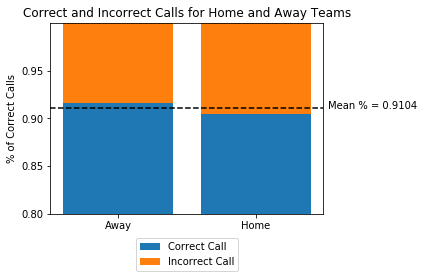

In [5]:
incrt_df = pitch_df.loc[pitch_df['Accurate'] == 0]

home_inc = len(incrt_df.loc[incrt_df["Home/Away"] == "Home"])
correct_df = pitch_df.loc[pitch_df["Accurate"]== 1]
home_crt = len(correct_df.loc[correct_df["Home/Away"]=="Home"])
home_crt_percent = home_crt / (home_inc + home_crt)
home_inc_percent = 1 - home_crt_percent

away_inc = len(incrt_df.loc[incrt_df["Home/Away"]=="Away"])
away_crt = len(correct_df.loc[correct_df["Home/Away"]=="Away"])
away_crt_percent = away_crt / (away_crt + away_inc)
away_inc_percent = 1 - away_crt_percent

correct_calls = [away_crt_percent, home_crt_percent]
incorrect_calls = [away_inc_percent, home_inc_percent]

mean_line = pitch_df["Accurate"].mean()
mean_line_round = round(mean_line,4)

fig = plt.figure()
width = 0.4
N= 2

ind = np.arange(N)
p1 = plt.bar(ind, correct_calls)
p2 = plt.bar(ind, incorrect_calls, bottom = correct_calls)

plt.ylabel("% of Correct Calls")
plt.xticks(ind,("Away", "Home"))
plt.yticks(np.arange(0.8, 1.0, 0.05))
plt.ylim(0.8,1.0)
plt.title("Correct and Incorrect Calls for Home and Away Teams")
pylab.legend((p1[0], p2[0]), ('Correct Call', 'Incorrect Call'), loc=9, bbox_to_anchor=(0.5, -0.1))

plt.axhline(y=mean_line, color = "black", ls = "dashed")
plt.text(1.52,0.91, (f"Mean % = {mean_line_round}"))


plt.tight_layout()
fig.savefig("Presentation_Images/Home_Away_Calls.png")
plt.show()

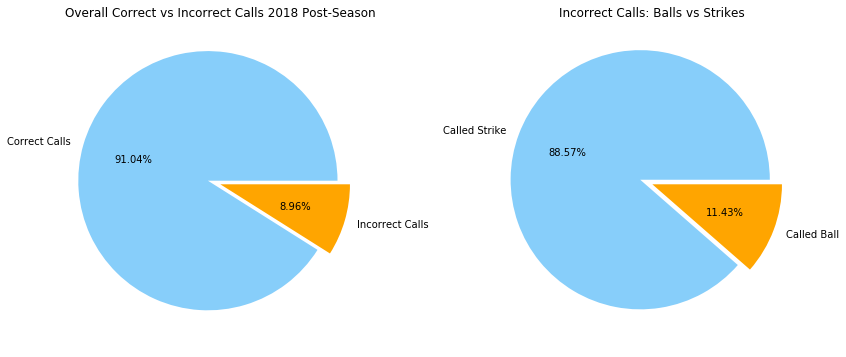

<Figure size 1440x720 with 0 Axes>

In [6]:
acc_data = pitch_df["Accurate"].value_counts()

incrt_df = pitch_df.loc[pitch_df['Accurate'] == 0]
incrt_data = incrt_df['Called Ball/Strike'].value_counts()

explode = [0.1, 0]
colors = ["lightskyblue", "orange"]
labels = ["Correct Calls", "Incorrect Calls"]
incrt_labels = ["Called Strike", "Called Ball"]



fig = plt.figure()

ax1 = fig.add_axes([0, 0, 0.75, 1.5], aspect=1)
ax1.pie(acc_data, explode = explode, labels = labels, autopct='%0.2f%%', colors = colors)

ax2 = fig.add_axes([1, .0, 0.75, 1.5], aspect=1)
ax2.pie(incrt_data, explode = explode, labels = incrt_labels, autopct='%0.2f%%', colors = colors)

ax1.set_title("Overall Correct vs Incorrect Calls 2018 Post-Season")
ax2.set_title("Incorrect Calls: Balls vs Strikes")

plt.figure(figsize=(20,10))
plt.tight_layout()

fig.savefig("Presentation_Images/dbl_pie_incorrect_calls.png",bbox_inches = "tight")
plt.show()

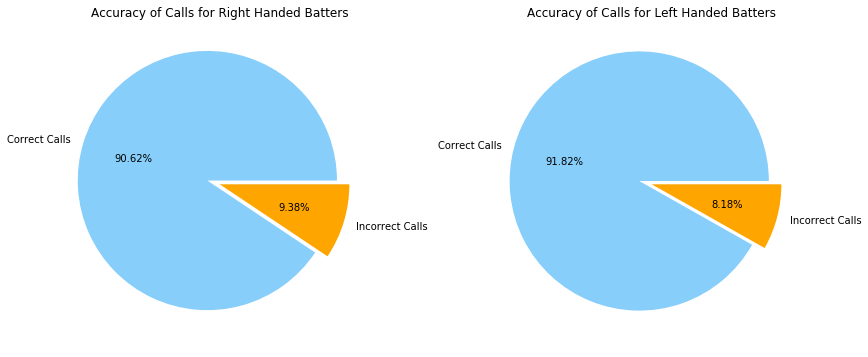

<Figure size 1440x720 with 0 Axes>

In [7]:
rh_df = pitch_df.loc[pitch_df["Batter_Hand"] =="R"]
lh_df = pitch_df.loc[pitch_df["Batter_Hand"] =="L"]

rh_data = rh_df["Accurate"].value_counts()
lh_data = lh_df["Accurate"].value_counts()

hand_labels = ["Correct Calls", "Incorrect Calls"]

fig = plt.figure()

ax1 = fig.add_axes([0, 0, 0.75, 1.5], aspect=1)
ax1.pie(rh_data, explode = explode, labels = hand_labels, autopct='%0.2f%%', colors = colors)

ax2 = fig.add_axes([1, .0, 0.75, 1.5], aspect=1)
ax2.pie(lh_data, explode = explode, labels = hand_labels, autopct='%0.2f%%', colors = colors)

ax1.set_title("Accuracy of Calls for Right Handed Batters")
ax2.set_title("Accuracy of Calls for Left Handed Batters")

plt.figure(figsize=(20,10))
plt.tight_layout()

fig.savefig("Presentation_Images/dbl_pie_right_left.png",bbox_inches = "tight")
plt.show()

In [35]:
ump_calls_df = pd.DataFrame({"Total Calls": pitch_df.groupby("Umpire")["Called Ball/Strike"].count(),
                            "Missed Calls":incrt_df.groupby("Umpire")["Accurate"].count(),
                            "Missed Call Percentage": incrt_df.groupby("Umpire")["Accurate"].count()/ 
                             pitch_df.groupby("Umpire")["Called Ball/Strike"].count()})

ump_calls_df['Umpire'] = ump_calls_df.index
ump_calls_df.sort_values(by=["Total Calls"], ascending = False)



ump_calls_df.head()

,Total Calls,Missed Calls,Missed Call Percentage,Umpire
Umpire,,,,
Adrian Johnson,148,17,0.114865,Adrian Johnson
Alan Porter,136,12,0.088235,Alan Porter
Angel Hernandez,138,11,0.079710,Angel Hernandez
Brian Gorman,143,14,0.097902,Brian Gorman
Chad Fairchild,254,16,0.062992,Chad Fairchild


<Figure size 1440x720 with 0 Axes>

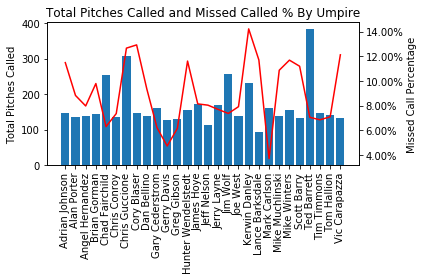

In [36]:
figure(figsize=(20,10))
# inc_mean_line = 1 - (mean_line * 100)


fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax2.plot(ump_calls_df["Missed Call Percentage"], color = "red")
ax1.bar(ump_calls_df["Umpire"], ump_calls_df["Total Calls"])

plt.title("Total Pitches Called and Missed Called % By Umpire")
plt.xlabel("Umpire Name")
ax2.set_ylabel("Missed Call Percentage")
ax1.set_ylabel("Total Pitches Called")

ax1.tick_params(axis='x', rotation=90)

vals = ax2.get_yticks()
ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

# plt.axhline(y=inc_mean_line, color = "black", ls = "dashed")


plt.tight_layout()

fig.savefig("Presentation_Images/Calls_by_ump.png")
plt.show()

In [37]:
bins = (65,70,75,80,85,90,95,100,105)
group_names = ("65-70", "71-75", "76-80", "81-85", "86-90", "91-95", "95-100", "101+")
pitch_df["Speed Bin"] = pd.cut(pitch_df["Pitch_Speed"], bins, labels=group_names)
incrt_df["Speed Bin"] = pd.cut(pitch_df["Pitch_Speed"], bins, labels=group_names)

pitch_speed_df = pd. DataFrame({"Total Calls": pitch_df.groupby("Speed Bin")["Called Ball/Strike"].count(),
                               "Incorrect Calls": incrt_df.groupby("Speed Bin")["Accurate"].count(),
                               "Incorrect %": incrt_df.groupby("Speed Bin")["Accurate"].count()/ 
                                pitch_df.groupby("Speed Bin")["Called Ball/Strike"].count()})
pitch_speed_df.fillna(0, inplace=True)

pitch_speed_df['Speed Bin'] = pitch_speed_df.index

pitch_speed_df

C:\Users\brian\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Total Calls,Incorrect Calls,Incorrect %,Speed Bin
Speed Bin,,,,
65-70,8,1,0.125000,65-70
71-75,134,19,0.141791,71-75
76-80,288,28,0.097222,76-80
81-85,640,48,0.075000,81-85
86-90,1175,102,0.086809,86-90
91-95,1470,151,0.102721,91-95
95-100,964,70,0.072614,95-100
101+,8,1,0.125000,101+


IndexError: tuple index out of range

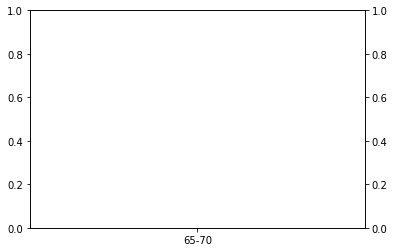

In [38]:
# figure(figsize=(30,20))

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax2.plot(pitch_speed_df["Incorrect %"], color = "red")
ax1.bar(pitch_speed_df["Speed Bin"], pitch_speed_df["Total Calls"])


plt.title("Total Pitches Called and Missed Called % by Pitch Speed")
plt.xlabel("Pitch Speed (MPH)")
ax1.set_ylabel("Total Pitches Called")
ax2.set_ylabel("Missed Call Percentage")

vals = ax2.get_yticks()
ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

# plt.xlim(60, 105)
plt.tight_layout()

fig.savefig("Presentation_Images/Calls_pitch_speed.png")
plt.show()

In [39]:
pitch_type_df = pd.DataFrame({"Total Calls": pitch_df.groupby("Pitch_Type")["Called Ball/Strike"].count(),
                              "Missed Calls": incrt_df.groupby("Pitch_Type")["Accurate"].count(),
                              "Missed Call %": incrt_df.groupby("Pitch_Type")["Accurate"].count() / 
                              pitch_df.groupby("Pitch_Type")["Called Ball/Strike"].count()})

pitch_type_df = pitch_type_df.rename(index={'FA': 'Fastball',
                    'SI': 'Sinker',
                    'CT': 'Cutter',
                    'CU': 'Curveball',
                    'SL': 'Slider',
                    'CH': 'Changeup',
                    'KN': 'Knuckleball',
                    'SP': 'Splitter',
                    'SC': 'Screwball',
                    'FO': 'Forkball',
                    'IB': 'Intentional Ball',
                    'PI': 'Pitchout'})

pitch_type_df['Pitch_Type'] = pitch_type_df.index


pitch_type_df

,Total Calls,Missed Calls,Missed Call %,Pitch_Type
Pitch_Type,,,,
Changeup,318,29,0.091195,Changeup
Cutter,422,49,0.116114,Cutter
Curveball,659,57,0.086495,Curveball
Fastball,2366,206,0.087067,Fastball
Sinker,184,19,0.103261,Sinker
Slider,686,58,0.084548,Slider
Splitter,53,2,0.037736,Splitter


ValueError: shape mismatch: objects cannot be broadcast to a single shape

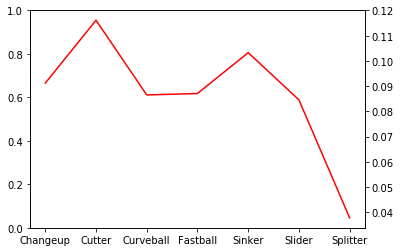

In [40]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax2.plot(pitch_type_df["Missed Call %"], color = "red")
ax1.bar(pitch_type_df["Pitch_Type"], ump_calls_df["Total Calls"])

plt.title("Total Pitches Called and Missed Call % By Pitch Type")
plt.xlabel("Pitch Type")
ax2.set_ylabel("Missed Call Percentage")
ax1.set_ylabel("Total Pitches Called")

ax1.tick_params(axis='x')

vals = ax2.get_yticks()
ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

# plt.axhline(y=inc_mean_line, color = "black", ls = "dashed")


plt.tight_layout()

fig.savefig("Presentation_Images/Calls_by_pitch_type.png")
plt.show()